In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/car_price_prediction_.csv')

In [4]:
data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [5]:
data.drop_duplicates()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [6]:
data.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [7]:
data['age'] = 2024 - data['Year']
df = data.drop(columns=['Year','Car ID'])
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(include=['object'])
print(df.head())

   Brand  Engine Size Fuel Type Transmission  Mileage Condition     Price  \
0  Tesla          2.3    Petrol       Manual   114832       New  26613.92   
1    BMW          4.4  Electric       Manual   143190      Used  14679.61   
2   Audi          4.5  Electric       Manual   181601       New  44402.61   
3  Tesla          4.1    Diesel    Automatic    68682       New  86374.33   
4   Ford          2.6    Diesel       Manual   223009  Like New  73577.10   

      Model  age  
0   Model X    8  
1  5 Series    6  
2        A4   11  
3   Model Y   13  
4   Mustang   15  


In [8]:
data.dtypes

,0
Car ID,int64
Brand,object
Year,int64
Engine Size,float64
Fuel Type,object
Transmission,object
Mileage,int64
Condition,object
Price,float64
Model,object


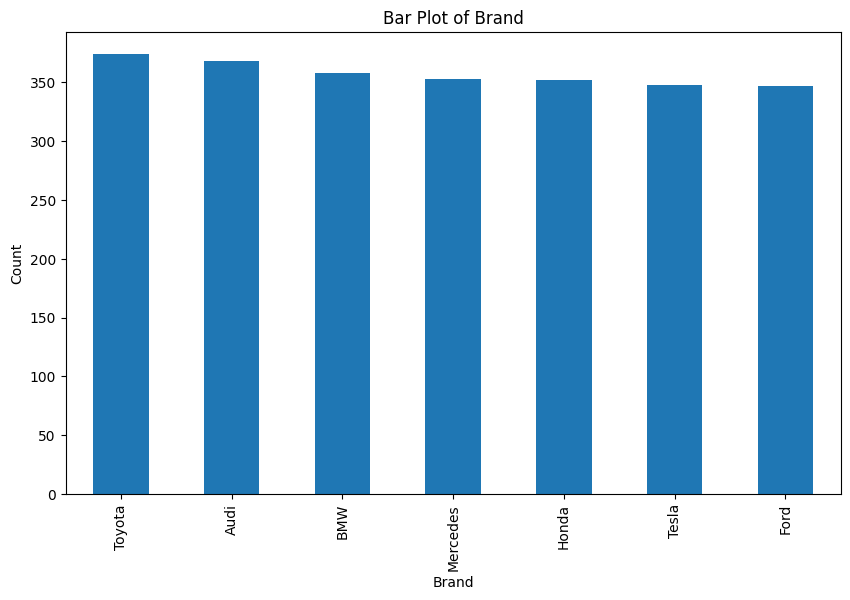

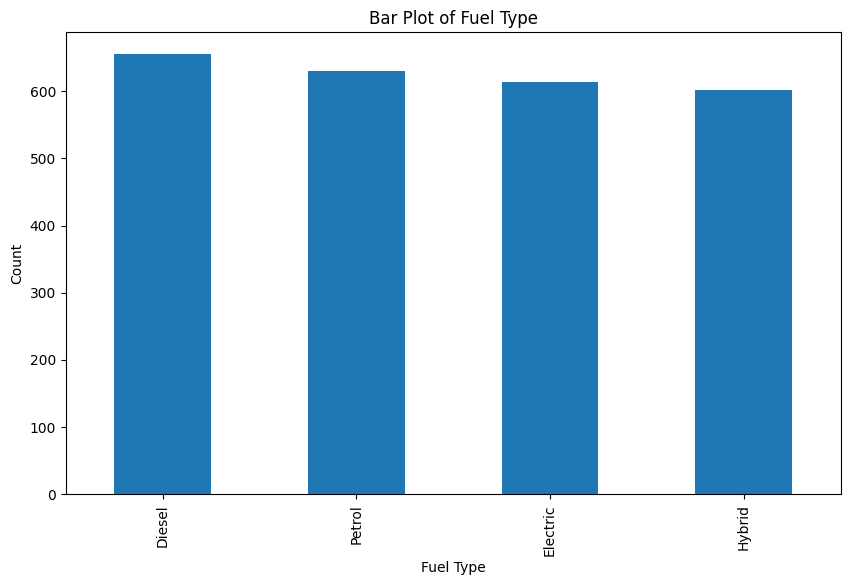

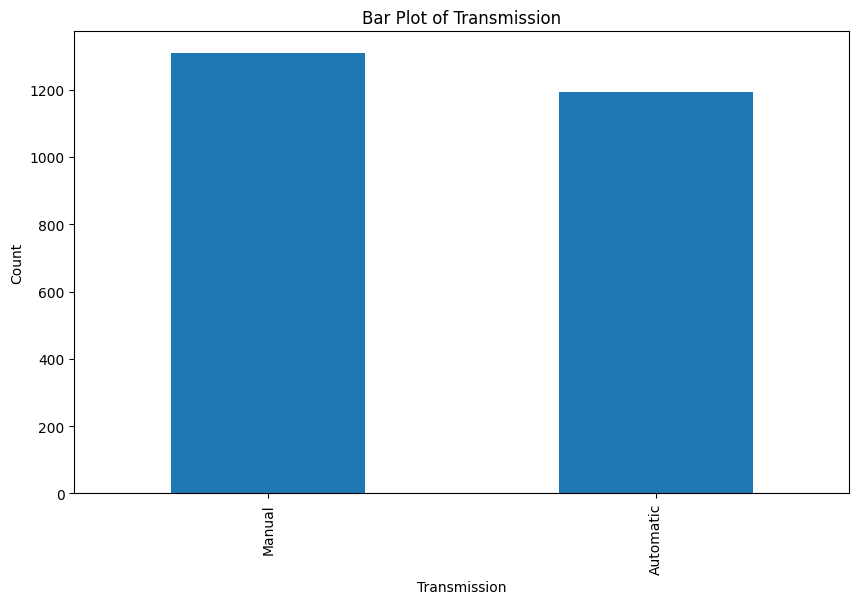

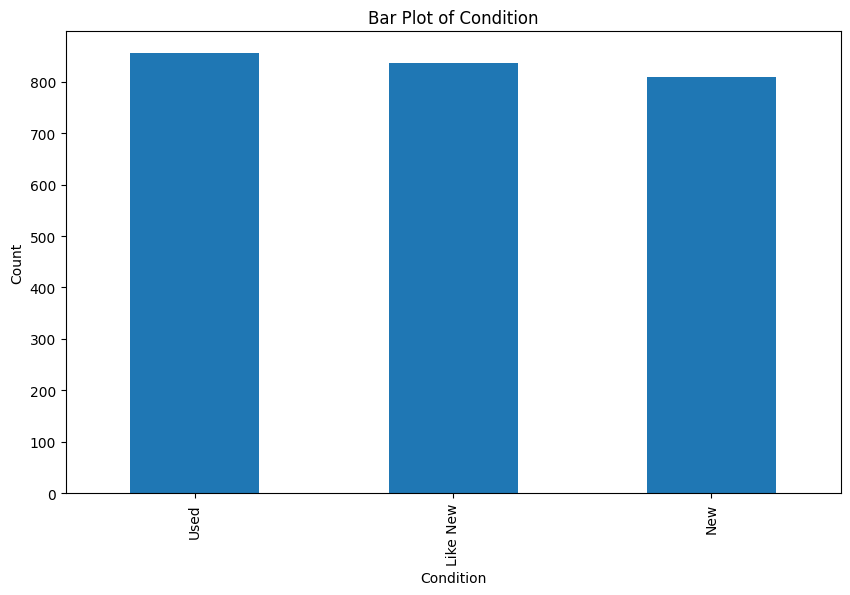

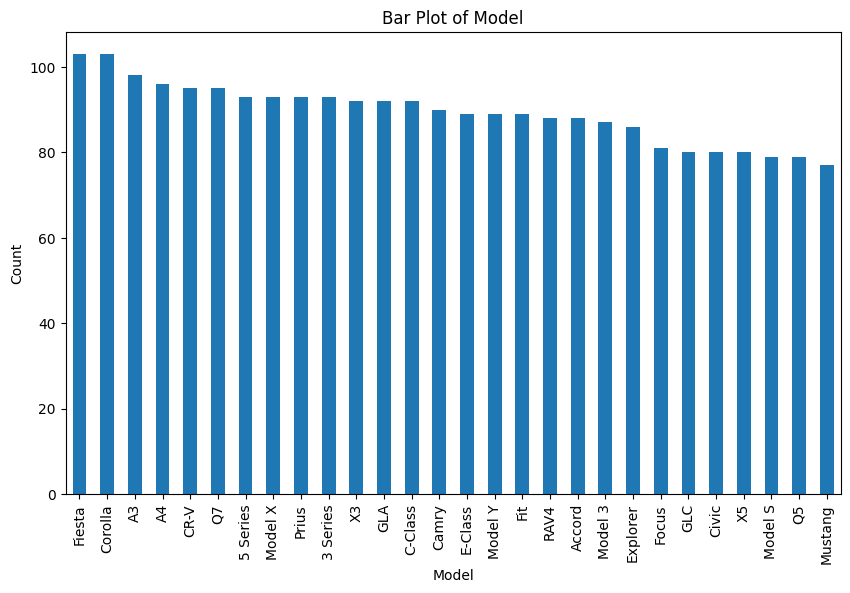

In [9]:
for i in cat_df.columns:
    plt.figure(figsize=(10, 6))
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [10]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size,2500.0,3.465240,1.432053,1.00,2.200,3.40,4.7000,6.00
Mileage,2500.0,149749.844800,87919.952034,15.00,71831.500,149085.00,225990.5000,299967.00
Price,2500.0,52638.022532,27295.833455,5011.27,28908.485,53485.24,75838.5325,99982.59
age,2500.0,12.373200,6.991700,1.00,6.000,12.00,19.0000,24.00


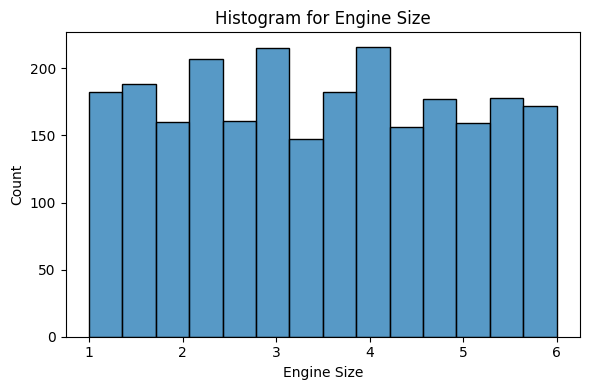

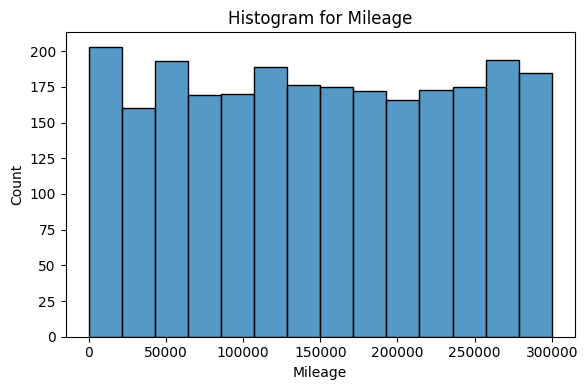

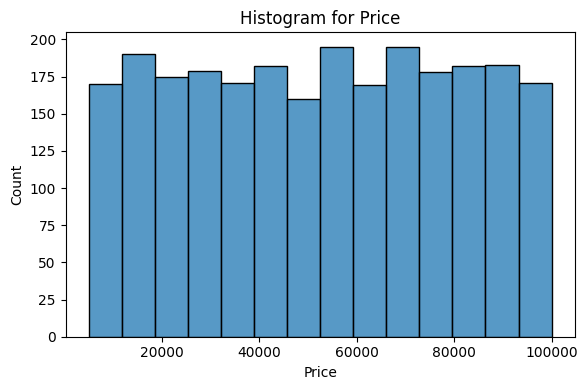

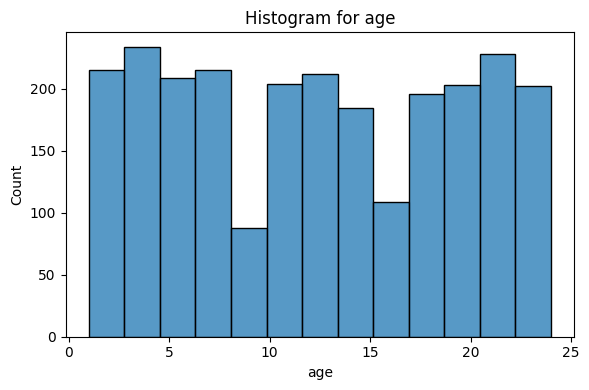

In [11]:
for i in num_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=num_df[i])
    plt.title(f'Histogram for {i}')
    plt.tight_layout()
    plt.show()

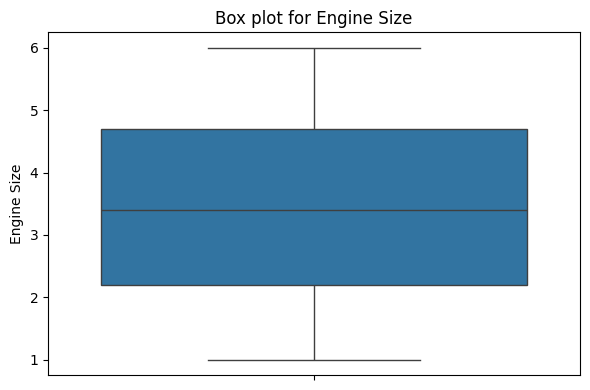

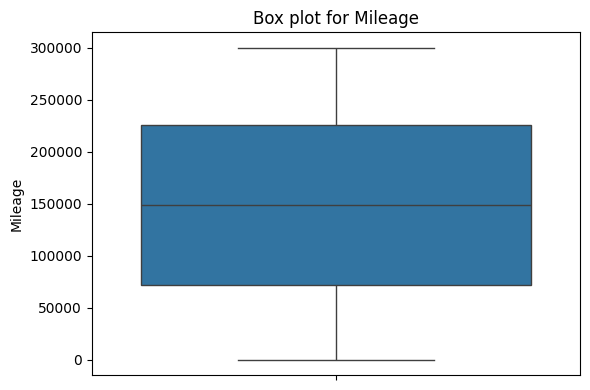

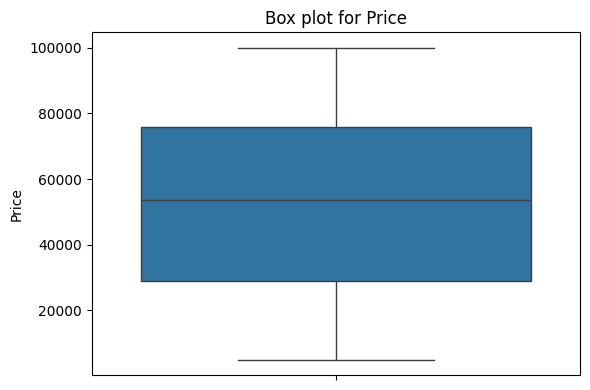

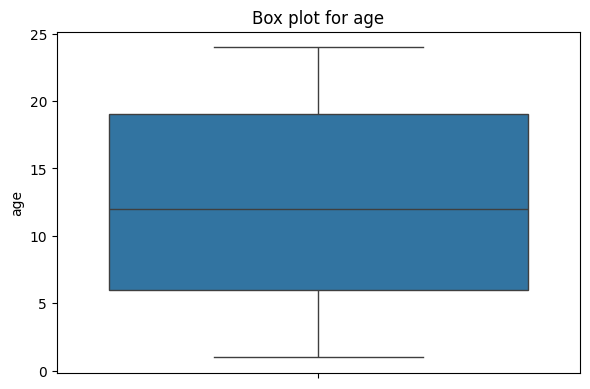

In [12]:
for i in num_df.columns:
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.boxplot(data=num_df[i])
    plt.title(f'Box plot for {i}')
    plt.tight_layout()
    plt.show()

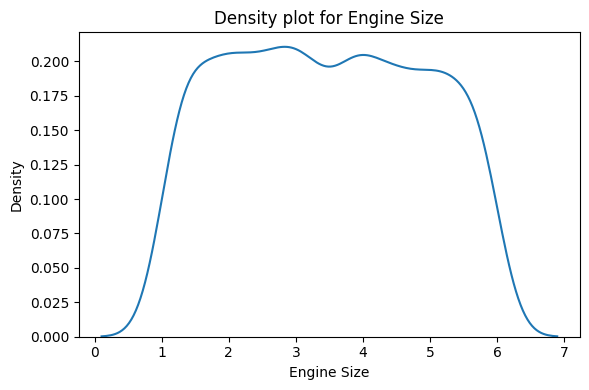

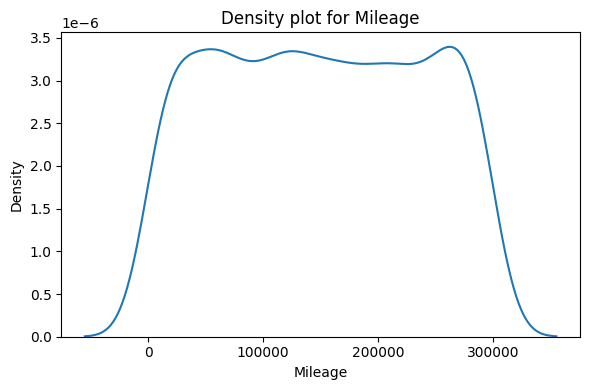

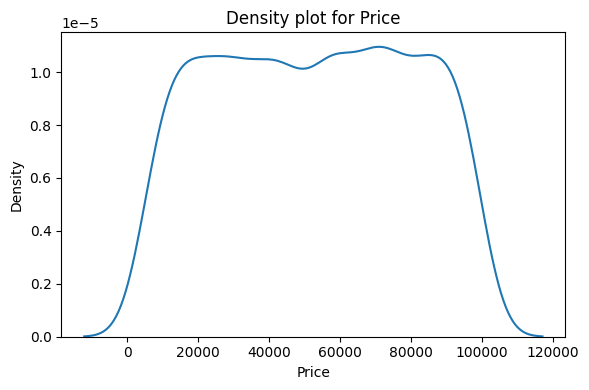

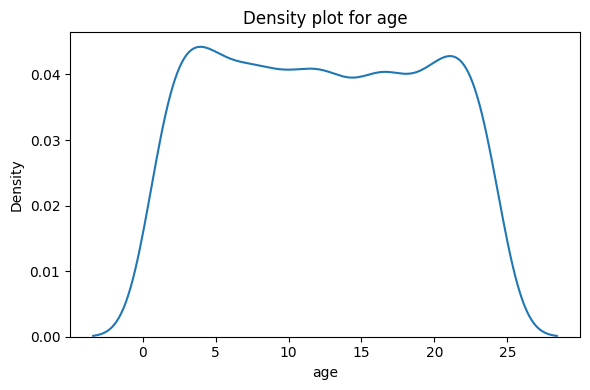

In [13]:
for column in num_df.columns:
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.kdeplot(data=num_df[column])
    plt.title(f'Density plot for {column}')
    plt.tight_layout()
    plt.show()

In [14]:
import scipy.stats as stats
#Calculate skewness and kurtosis
skewness = num_df.skew()
kurtosis = num_df.apply(stats.kurtosis)

# Create a new DataFrame to display skewness and kurtosis
skew_kurt_df = pd.DataFrame({
    'skewness': skewness,
    'kurtosis': kurtosis
})

# Print the new table for skewness and kurtosis
print(skew_kurt_df)

             skewness  kurtosis
Engine Size  0.035972 -1.182983
Mileage      0.007337 -1.224902
Price       -0.014484 -1.207737
age          0.022938 -1.242990


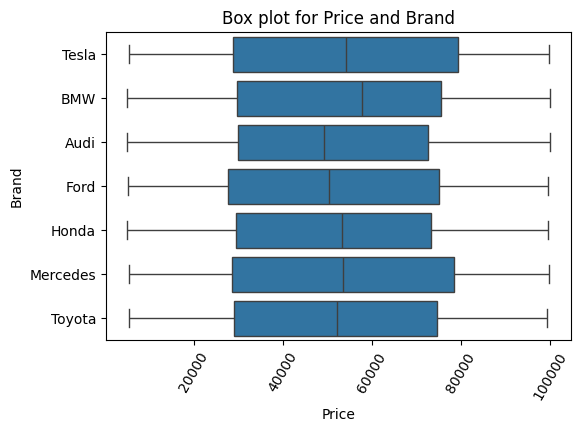

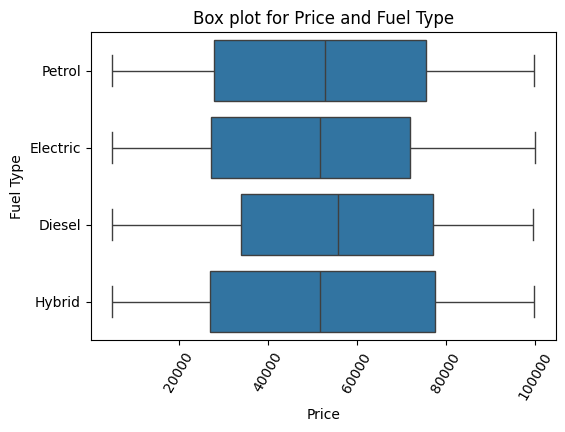

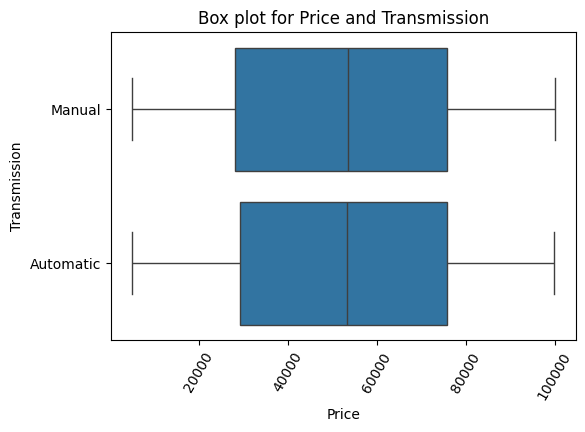

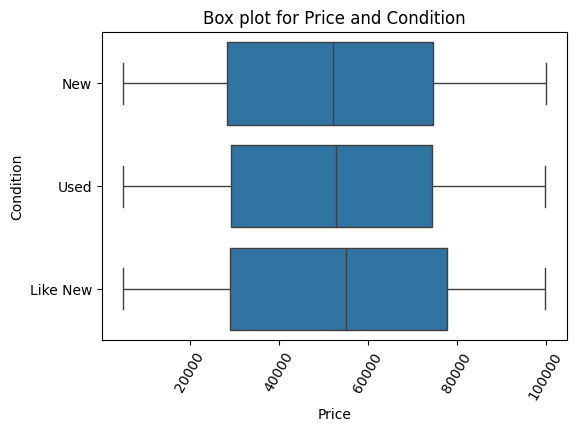

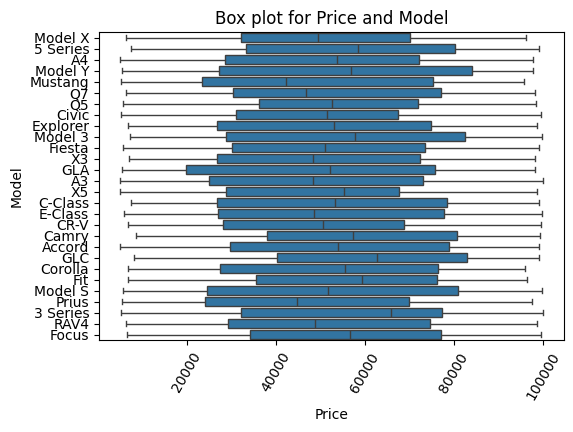

In [15]:
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(6, 4))  # Set figure size for each plot
        sns.boxplot(data=df, x='Price', y=i)
        plt.xticks(rotation=60)
        plt.title(f'Box plot for Price and {i}')
        plt.show()

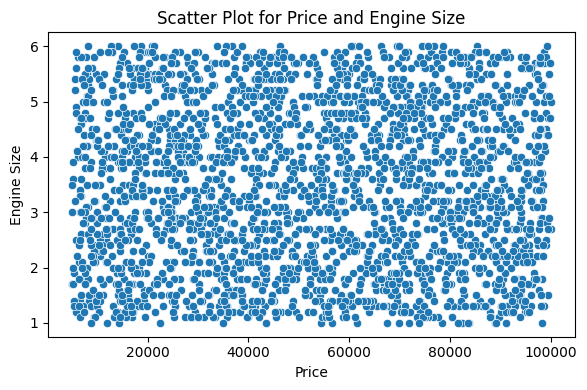

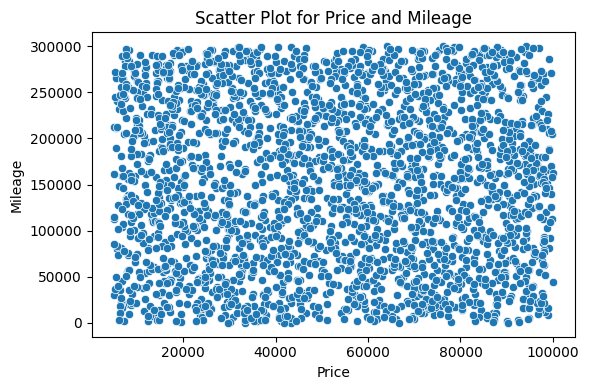

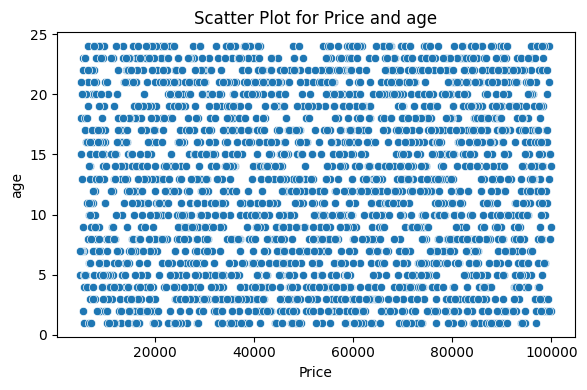

In [16]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        if i != 'Price':
            plt.figure(figsize=(6, 4))  # Set figure size for each plot
            sns.scatterplot(data=df, x='Price', y=i)
            plt.title(f'Scatter Plot for Price and {i}')
            plt.tight_layout()
            plt.show()

<Axes: >

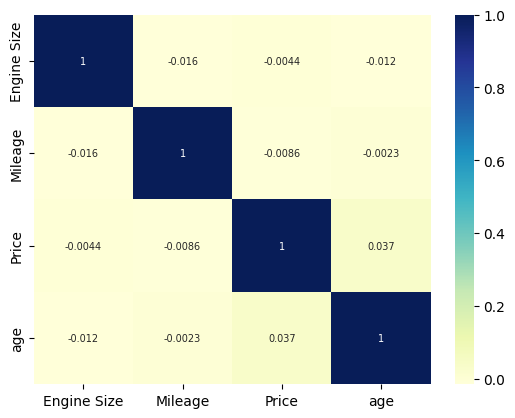

In [17]:
dataplot = sns.heatmap(num_df.corr(), cmap="YlGnBu", annot=True, annot_kws={"size": 7})

# Displaying heatmap
dataplot

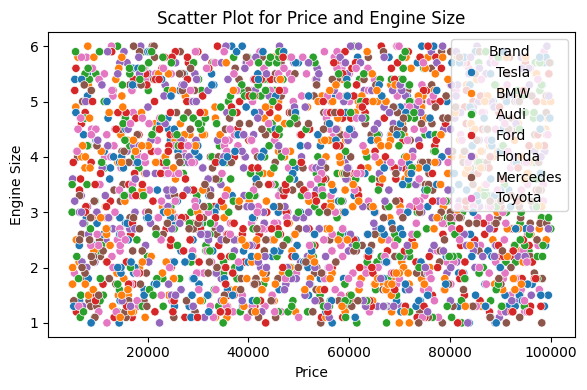

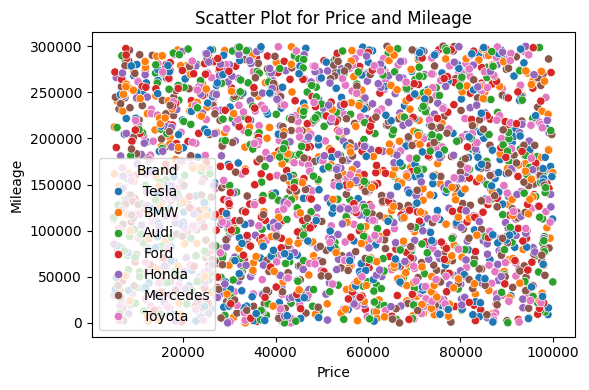

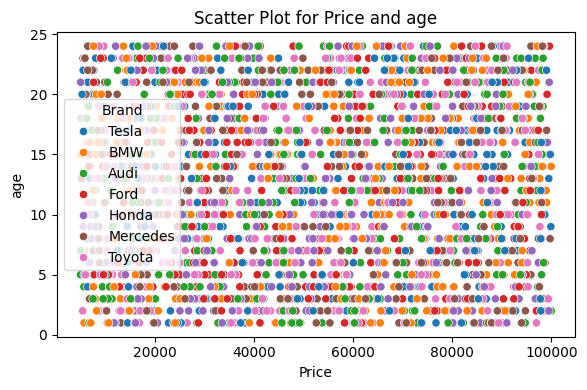

In [18]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        if i != 'Price':
            plt.figure(figsize=(6, 4))  # Set figure size for each plot
            sns.scatterplot(data=df, x='Price', y=i, hue = 'Brand')
            plt.title(f'Scatter Plot for Price and {i}')
            plt.tight_layout()
            plt.show()

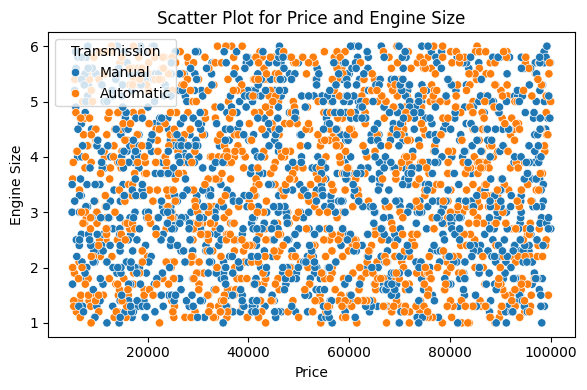

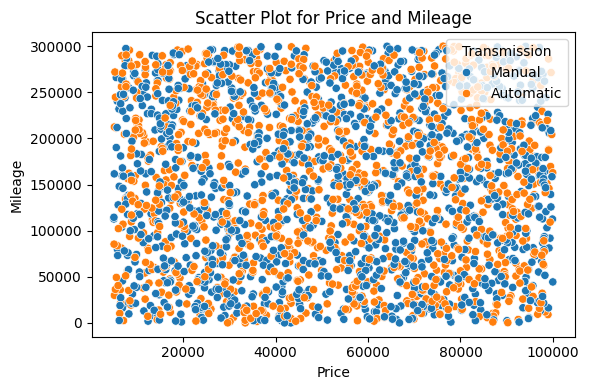

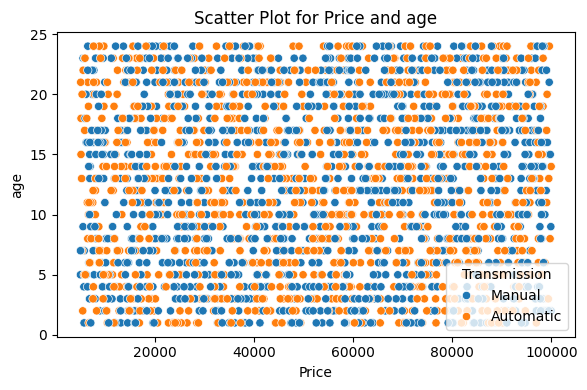

In [19]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        if i != 'Price':
            plt.figure(figsize=(6, 4))  # Set figure size for each plot
            sns.scatterplot(data=df, x='Price', y=i,hue='Transmission')
            plt.title(f'Scatter Plot for Price and {i}')
            plt.tight_layout()
            plt.show()

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import scipy.stats as stats

# Load data
data = pd.read_csv('/content/car_price_prediction_.csv')

# Preprocess data
data.drop_duplicates(inplace=True)
data['age'] = 2024 - data['Year']
df = data.drop(columns=['Year', 'Car ID'])

# Separate numerical and categorical data
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(include=['object'])

# Create the PDF file
pdf_filename = "/content/car_price_data_report_1.pdf"
pdf = PdfPages(pdf_filename)

# 1. Add DataFrame Table to PDF
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.head().values, colLabels=df.columns, loc='center')
pdf.savefig(fig)
plt.close(fig)

# 2. Add Summary of Numerical Data
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
num_summary = num_df.describe()
table = ax.table(cellText=num_summary.values, colLabels=num_summary.columns, rowLabels=num_summary.index, loc='center')
pdf.savefig(fig)
plt.close(fig)

# 3. Add Categorical Data Summary
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
cat_summary = cat_df.apply(lambda x: x.value_counts()).fillna(0)
table = ax.table(cellText=cat_summary.values, colLabels=cat_summary.columns, rowLabels=cat_summary.index, loc='center')
pdf.savefig(fig)
plt.close(fig)

# 4. Bar Plots for Categorical Variables
for col in cat_df.columns:
    plt.figure(figsize=(10, 6))
    cat_df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    pdf.savefig()
    plt.close()

# 5. Histograms for Numerical Variables
for col in num_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(num_df[col], kde=True, color='orange')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    pdf.savefig()
    plt.close()

# 6. Box Plots for Numerical Variables
for col in num_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=num_df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    pdf.savefig()
    plt.close()

# 7. Density Plots for Numerical Variables
for col in num_df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(num_df[col], fill=True, color='purple')
    plt.title(f'Density Plot of {col}')
    pdf.savefig()
    plt.close()

# 8. Skewness and Kurtosis Table
skewness = num_df.skew()
kurtosis = num_df.apply(stats.kurtosis)
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=skew_kurt_df.values, colLabels=skew_kurt_df.columns, rowLabels=skew_kurt_df.index, loc='center')
pdf.savefig(fig)
plt.close(fig)

# 9. Box Plots for Price vs Categorical Variables
for col in cat_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='Price', palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Box Plot of Price vs {col}')
    pdf.savefig()
    plt.close()

# 10. Scatter Plots for Price vs Numerical Variables
for col in num_df.columns:
    if col != 'Price':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col, y='Price', color='blue')
        plt.title(f'Scatter Plot of Price vs {col}')
        pdf.savefig()
        plt.close()

# 11. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
pdf.savefig()
plt.close()

# Save the PDF
pdf.close()
print(f"PDF report generated and saved as {pdf_filename}")

<ipython-input-42-bd31768452fb>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Price', palette='Set2')
<ipython-input-42-bd31768452fb>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Price', palette='Set2')
<ipython-input-42-bd31768452fb>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='Price', palette='Set2')
<ipython-input-42-bd31768452fb>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

PDF report generated and saved as /content/car_price_data_report_1.pdf


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import scipy.stats as stats

# Load your data
data = pd.read_csv('/content/car_price_prediction_.csv')

# Drop duplicates and create new 'age' column
data.drop_duplicates(inplace=True)
data['age'] = 2024 - data['Year']
df = data.drop(columns=['Year', 'Car ID'])

# Separate numerical and categorical data
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(include=['object'])

# Create the PDF file
pdf_filename = "/content/car_price_data_report.pdf"
pdf = PdfPages(pdf_filename)

# 1. Adding the DataFrame as a Table to the PDF
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size
ax.axis('tight')
ax.axis('off')
table_data = df.head().values.tolist()
table = ax.table(cellText=table_data, colLabels=df.columns, loc='center')

pdf.savefig(fig)  # Save the figure
plt.close(fig)

# 2. Add a Summary of Numerical Data
fig, ax = plt.subplots(figsize=(12, 6))
num_summary = num_df.describe()
ax.axis('tight')
ax.axis('off')
num_summary_data = num_summary.values.tolist()
num_summary_table = ax.table(cellText=num_summary_data, colLabels=num_summary.columns, loc='center')

pdf.savefig(fig)
plt.close(fig)

# 3. Add Categorical Data Summary (value counts)
fig, ax = plt.subplots(figsize=(12, 6))
cat_summary = cat_df.apply(lambda x: x.value_counts()).fillna(0)
ax.axis('tight')
ax.axis('off')
cat_summary_data = cat_summary.values.tolist()
cat_summary_table = ax.table(cellText=cat_summary_data, colLabels=cat_summary.columns, loc='center')

pdf.savefig(fig)
plt.close(fig)

# 4. Create and Save Bar Plots for Categorical Variables
for i in cat_df.columns:
    plt.figure(figsize=(10, 6))
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    pdf.savefig()  # Save the plot in the PDF
    plt.close()

# 5. Create and Save Histograms for Numerical Variables
for i in num_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=num_df[i])
    plt.title(f'Histogram for {i}')
    plt.tight_layout()
    pdf.savefig()  # Save the plot in the PDF
    plt.close()

# 6. Create and Save Box Plots for Numerical Variables
for i in num_df.columns:
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.boxplot(data=num_df[i])
    plt.title(f'Box Plot for {i}')
    plt.tight_layout()
    pdf.savefig()  # Save the plot in the PDF
    plt.close()

# 7. Create and Save Density Plots for Numerical Variables
for column in num_df.columns:
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.kdeplot(data=num_df[column])
    plt.title(f'Density Plot for {column}')
    plt.tight_layout()
    pdf.savefig()  # Save the plot in the PDF
    plt.close()

# 8. Calculate Skewness and Kurtosis for Numerical Data
skewness = num_df.skew()
kurtosis = num_df.apply(stats.kurtosis)

# Create a new DataFrame to display skewness and kurtosis
skew_kurt_df = pd.DataFrame({
    'skewness': skewness,
    'kurtosis': kurtosis
})

# Save skewness and kurtosis table in the PDF
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
skew_kurt_data = skew_kurt_df.values.tolist()
skew_kurt_table = ax.table(cellText=skew_kurt_data, colLabels=skew_kurt_df.columns, loc='center')

pdf.savefig(fig)
plt.close(fig)

# 9. Box Plots for Price vs Categorical Variables
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(6, 4))  # Set figure size for each plot
        sns.boxplot(data=df, x='Price', y=i)
        plt.xticks(rotation=60)
        plt.title(f'Box Plot for Price and {i}')
        pdf.savefig()  # Save the plot in the PDF
        plt.close()

# 10. Scatter Plots for Price vs Numerical Variables
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        if i != 'Price':
            plt.figure(figsize=(6, 4))  # Set figure size for each plot
            sns.scatterplot(data=df, x='Price', y=i)
            plt.title(f'Scatter Plot for Price and {i}')
            plt.tight_layout()
            pdf.savefig()  # Save the plot in the PDF
            plt.close()

# 11. Correlation Heatmap
plt.figure(figsize=(8, 6))
dataplot = sns.heatmap(num_df.corr(), cmap="YlGnBu", annot=True, annot_kws={"size": 7})
plt.title('Correlation Heatmap')
pdf.savefig()  # Save the heatmap in the PDF
plt.close()

# 12. Scatter Plots for Price vs Numerical Variables with 'Brand' as hue
for i in df.columns:
    if df[i].dtype in ['int64', 'float64']:
        if i != 'Price':
            plt.figure(figsize=(6, 4))  # Set figure size for each plot
            sns.scatterplot(data=df, x='Price', y=i, hue='Brand')
            plt.title(f'Scatter Plot for Price and {i} with Brand as Hue')
            plt.tight_layout()
            pdf.savefig()  # Save the plot in the PDF
            plt.close()

# Save the PDF
pdf.close()

print(f"PDF generated and saved as {pdf_filename}")

PDF generated and saved as /content/car_price_data_report.pdf


In [38]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=f6ed20a8d19333747b4a0ea1f4c947221ab4bad615eca437f084a6e907fefc8b
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [25]:
# Load the dataset (replace with your actual data file)
df = pd.read_csv('/content/car_price_prediction_.csv')  # Replace with your dataset path

# Inspect the first few rows
print(df.head())

# Check for missing values and datatypes
print(df.info())

   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4  

In [27]:
df.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from fpdf import FPDF
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/car_price_prediction_.csv')

# Create a PDF class
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Car Price Prediction Dataset Report', border=0, ln=1, align='C')
        self.ln(10)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, border=0, ln=1, align='L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 10)
        self.multi_cell(0, 10, body)
        self.ln()

# Initialize the PDF
pdf = PDF()
pdf.add_page()

# Dataset summary
pdf.chapter_title('Dataset Summary')
summary = df.describe(include='all').to_string()
pdf.chapter_body(summary)

# Handle missing values
pdf.chapter_title('Handling Missing Values')
missing_values = df.isnull().sum().to_string()
pdf.chapter_body("Missing Values Before Handling:\n" + missing_values)

# For numerical columns, replace missing values with the median
df[['Year', 'Engine Size', 'Mileage']] = df[['Year', 'Engine Size', 'Mileage']].fillna(df[['Year', 'Engine Size', 'Mileage']].median())

# For categorical columns, replace missing values with the most frequent value
df[['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']] = df[['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']].apply(lambda x: x.fillna(x.mode()[0]))
pdf.chapter_body("Missing Values After Handling:\n" + df.isnull().sum().to_string())

# Drop 'Car ID' column
df.drop('Car ID', axis=1, inplace=True)
pdf.chapter_body("Dropped 'Car ID' column as it is a unique identifier.")

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'], drop_first=True)
pdf.chapter_body("Applied one-hot encoding to categorical columns.")

# Split the data into features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pdf.chapter_body("Standardized the feature columns.")

# Generate a correlation heatmap and save it
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('/content/correlation_heatmap.png')
plt.close()
pdf.add_page()
pdf.chapter_title('Correlation Heatmap')
pdf.image('/content/correlation_heatmap.png', x=10, y=30, w=180)

# Save the PDF
pdf.output('/content/Car_Price_Report_3.pdf')
print("PDF report generated and saved as 'Car_Price_Report_3.pdf'.")


PDF report generated and saved as 'Car_Price_Report_3.pdf'.


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv('/content/car_price_prediction_.csv')  # Replace with your dataset path

# Inspect the first few rows
print(df.head())

# Handle missing values
# For numerical columns, we replace missing values with the median
df[['Year', 'Engine Size', 'Mileage']] = df[['Year', 'Engine Size', 'Mileage']].fillna(df[['Year', 'Engine Size', 'Mileage']].median())

# For categorical columns, we replace missing values with the most frequent value (mode)
df[['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']] = df[['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']].apply(lambda x: x.fillna(x.mode()[0]))

# Drop 'Car ID' as it's a unique identifier and doesn't help in prediction
df.drop('Car ID', axis=1, inplace=True)

# One-hot encode categorical columns ('Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model')
df = pd.get_dummies(df, columns=['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'], drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('Price', axis=1)  # 'Price' is the target column
y = df['Price']  # 'Price' is the target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now the data is ready for modeling


   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  


In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from fpdf import FPDF

# Load the data (assuming it's in a CSV file)
df = pd.read_csv('/content/car_price_prediction_.csv')

# Display first few rows to check the data
print(df.head())

# Preprocessing the data
# Convert categorical columns into numerical values using LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Condition'] = label_encoder.fit_transform(df['Condition'])
df['Model'] = label_encoder.fit_transform(df['Model'])

# Handle missing values if any (assuming 'Price' is the target variable)
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df[['Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage', 'Condition', 'Model']]
y = df['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models
linear_evaluation = (
    f"Linear Regression Model Evaluation:\n"
    f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_linear)}\n"
    f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear)}\n"
    f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_linear))}\n\n"
)

rf_evaluation = (
    f"Random Forest Model Evaluation:\n"
    f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}\n"
    f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}\n"
    f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}\n\n"
)

gb_evaluation = (
    f"Gradient Boosting Model Evaluation:\n"
    f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gb)}\n"
    f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gb)}\n"
    f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_gb))}\n\n"
)

# Optionally, cross-validation for more robust performance estimation
cross_val_scores = cross_val_score(rf_model, X, y, cv=5)
cross_val_report = f"Cross-validation scores for Random Forest: {cross_val_scores}\n"

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Car Price Prediction Model Report', border=0, ln=1, align='C')
        self.ln(10)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, border=0, ln=1, align='L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 10)
        self.multi_cell(0, 10, body)
        self.ln()

# Initialize PDF
pdf = PDF()
pdf.add_page()

# Add sections to the PDF
pdf.chapter_title('Dataset Overview')
pdf.chapter_body(df.describe(include='all').to_string())

pdf.chapter_title('Model Evaluation - Linear Regression')
pdf.chapter_body(linear_evaluation)

pdf.chapter_title('Model Evaluation - Random Forest')
pdf.chapter_body(rf_evaluation)

pdf.chapter_title('Model Evaluation - Gradient Boosting')
pdf.chapter_body(gb_evaluation)

pdf.chapter_title('Cross-validation Report')
pdf.chapter_body(cross_val_report)

# Save PDF
pdf.output('/content/Car_Price_Model_Report_4.pdf')
print("PDF report generated and saved as 'Car_Price_Model_Report.pdf'.")


   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  
PDF report generated and saved as 'Car_Price_Model_Report.pdf'.


In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Load the data (assuming it's in a CSV file)
df = pd.read_csv('/content/car_price_prediction_.csv')

# Display first few rows to check the data
print(df.head())

# Preprocessing the data
# Convert categorical columns into numerical values using LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Condition'] = label_encoder.fit_transform(df['Condition'])
df['Model'] = label_encoder.fit_transform(df['Model'])

# Handle missing values if any (assuming 'Price' is the target variable)
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df[['Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage', 'Condition', 'Model']]
y = df['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print("\n")

print("Random Forest Model Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print("\n")

print("Gradient Boosting Model Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gb)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print("\n")

# Optionally, cross-validation for more robust performance estimation
print("Cross-validation scores for Random Forest:", cross_val_score(rf_model, X, y, cv=5))


   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  
Linear Regression Model Evaluation:
Mean Absolute Error: 23692.564222638546
Mean Squared Error: 759016533.5678779
Root Mean Squared Error: 27550.254691524686


Random Forest Model Evaluation:
Mean Absolute Error: 24316.7636506
Mean Squared Error: 799394574.3708909
Root Mean Squared Error: 28273.566707631544


Gradient Boosting Model Evaluation:
Mean Absolute Error: 2

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data (assuming it's in a CSV file)
df = pd.read_csv('/content/car_price_prediction_.csv')

# Display first few rows to check the data
print(df.head())

# Preprocessing the data
# Convert categorical columns into numerical values using LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Condition'] = label_encoder.fit_transform(df['Condition'])
df['Model'] = label_encoder.fit_transform(df['Model'])

# Handle missing values if any (assuming 'Price' is the target variable)
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df[['Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage', 'Condition', 'Model']]
y = df['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predict using the models
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models using MAE, MSE, RMSE, and R-Squared
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R-Squared: {r2_score(y_test, y_pred_linear)}")
print("\n")

print("Random Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R-Squared: {r2_score(y_test, y_pred_rf)}")
print("\n")

print("Gradient Boosting Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"R-Squared: {r2_score(y_test, y_pred_gb)}")
print("\n")

# Cross-validation for more robust performance estimation (using R-Squared for evaluation)
print("Cross-validation scores (R-squared) for Random Forest:")
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(cv_scores_rf)

print("Cross-validation scores (R-squared) for Gradient Boosting:")
cv_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print(cv_scores_gb)

# Cross-validation for Linear Regression
print("Cross-validation scores (R-squared) for Linear Regression:")
cv_scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
print(cv_scores_linear)


   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  
Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 23692.564222638546
Mean Squared Error (MSE): 759016533.5678779
Root Mean Squared Error (RMSE): 27550.254691524686
R-Squared: -0.0019314828693974828


Random Forest Model Evaluation:
Mean Absolute Error (MAE): 24316.7636506
Mean Squared Error (MSE): 799394574.3708909
Root Mean Squared Error (RMSE): 28273.5

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from fpdf import FPDF

# Load the data (assuming it's in a CSV file)
df = pd.read_csv('/content/car_price_prediction_.csv')

# Display first few rows to check the data
print(df.head())

# Preprocessing the data
# Convert categorical columns into numerical values using LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Condition'] = label_encoder.fit_transform(df['Condition'])
df['Model'] = label_encoder.fit_transform(df['Model'])

# Handle missing values if any (assuming 'Price' is the target variable)
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df[['Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage', 'Condition', 'Model']]
y = df['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predict using the models
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models
linear_evaluation = (
    f"Linear Regression Model Evaluation:\n"
    f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear)}\n"
    f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}\n"
    f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_linear))}\n"
    f"R-Squared: {r2_score(y_test, y_pred_linear)}\n\n"
)

rf_evaluation = (
    f"Random Forest Model Evaluation:\n"
    f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}\n"
    f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}\n"
    f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf))}\n"
    f"R-Squared: {r2_score(y_test, y_pred_rf)}\n\n"
)

gb_evaluation = (
    f"Gradient Boosting Model Evaluation:\n"
    f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gb)}\n"
    f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb)}\n"
    f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_gb))}\n"
    f"R-Squared: {r2_score(y_test, y_pred_gb)}\n\n"
)

# Cross-validation for more robust performance estimation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
cv_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
cv_scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring='r2')

cv_report = (
    f"Cross-validation scores (R-squared):\n"
    f"Random Forest: {cv_scores_rf}\n"
    f"Gradient Boosting: {cv_scores_gb}\n"
    f"Linear Regression: {cv_scores_linear}\n"
)

# Generate PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Car Price Prediction Model Report', border=0, ln=1, align='C')
        self.ln(10)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, border=0, ln=1, align='L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 10)
        self.multi_cell(0, 10, body)
        self.ln()

# Initialize PDF
pdf = PDF()
pdf.add_page()

# Add sections to the PDF
pdf.chapter_title('Dataset Overview')
pdf.chapter_body(df.describe(include='all').to_string())

pdf.chapter_title('Model Evaluation - Linear Regression')
pdf.chapter_body(linear_evaluation)

pdf.chapter_title('Model Evaluation - Random Forest')
pdf.chapter_body(rf_evaluation)

pdf.chapter_title('Model Evaluation - Gradient Boosting')
pdf.chapter_body(gb_evaluation)

pdf.chapter_title('Cross-validation Report')
pdf.chapter_body(cv_report)

# Save PDF
pdf.output('/content/Car_Price_Model_Report_5.pdf')
print("PDF report generated and saved as 'Car_Price_Model_Report.pdf'.")


   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  
PDF report generated and saved as 'Car_Price_Model_Report.pdf'.
